In [1]:
import sqlite3
import datetime
import os
import numpy

connection = sqlite3.connect('input_logs.db')
cursor = connection.cursor()

print("Clicks count: ", cursor.execute('SELECT COUNT(*) FROM Clicks').fetchone()[0])

Clicks count:  5378


In [2]:
# Print one data sample

for row in cursor.execute('SELECT * FROM Clicks ORDER BY time'):
    print(row)
    break

('2020-04-23 16:26:03.588742', 1466, 188, 'Button.left', 1)


In [3]:
# Take only left mouse clicks

left_button = []

for row in cursor.execute('SELECT * FROM Clicks ORDER BY time'):
    if (row[3] == 'Button.left'):
        left_button.append(row)

len(left_button)

4936

In [4]:
# Compute time difference between clicks 

state = 0 # Start from button pressed (1)
measurements = []

for i in range(len(left_button)):
    if state != left_button[i][4]:
        state = left_button[i][4]

        if state == 1: # If mouse down
            button_down = left_button[i]
        elif state == 0:
            button_up =  left_button[i]
            
            down_time = datetime.datetime.strptime(button_down[0], '%Y-%m-%d %H:%M:%S.%f')
            up_time = datetime.datetime.strptime(button_up[0], '%Y-%m-%d %H:%M:%S.%f')
            measurements.append((up_time - down_time).microseconds / 1000)

print(measurements[0])
print(len(measurements))

80.145
2467


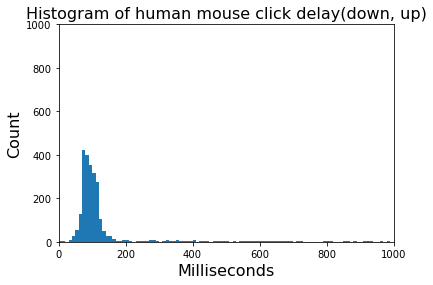

In [5]:
# Data density

import math
import random
import matplotlib.pyplot as plt

plt.hist(measurements, bins=range(0, 1000, 10))
plt.title('Histogram of human mouse click delay(down, up)', size= 16)
plt.ylabel('Count', size= 16)
plt.xlabel('Milliseconds', size= 16)
plt.axis([0, 1000, 0, 1000])
plt.show()

In [6]:

import numpy

print("Log mean: ", numpy.mean(numpy.log(measurements)))
print("Log std: ", numpy.std(numpy.log(measurements)))

print("Mean: ", numpy.mean(measurements))
print("Std: ", numpy.std(measurements))

Log mean:  4.679273663906574
Log std:  0.5586281586927732
Mean:  135.65109201459262
Std:  143.65010169806584


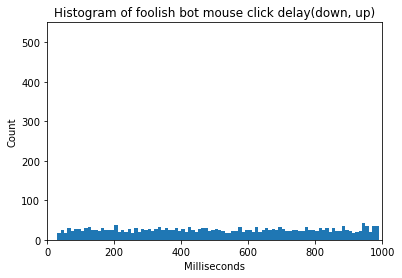

In [7]:
# Foolish bot

import random
import numpy
import matplotlib.pyplot as plt

bot_measurements = []
for i in range(2467):
    bot_measurements.append(random.uniform(30, 1000))

plt.hist(bot_measurements, bins=range(0, 1000, 10))
plt.title('Histogram of foolish bot mouse click delay(down, up)')
plt.ylabel('Count')
plt.xlabel('Milliseconds')
plt.axis([0, 1000, 0, 550])
plt.show()

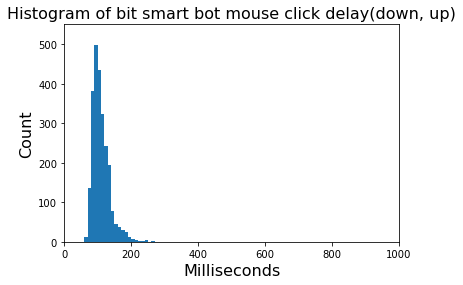

In [8]:
# A bit smart bot. Implemented using a lognormal distribution.

import random
import numpy
import matplotlib.pyplot as plt


bot_measurements = (numpy.random.lognormal(4, 0.4, 2467)) + 50

plt.hist(bot_measurements, bins=range(0, 1000, 10))
plt.title('Histogram of bit smart bot mouse click delay(down, up)', size= 16)
plt.ylabel('Count', size= 16)
plt.xlabel('Milliseconds', size= 16)
plt.axis([0, 1000, 0, 550])
plt.show()

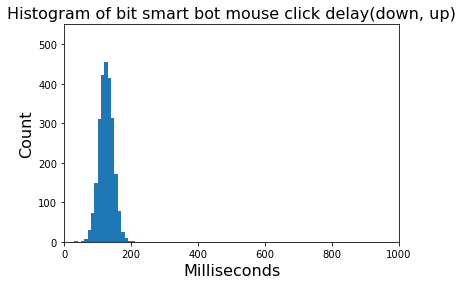

In [9]:
# A bit smart bot. Implemented using a normal distribution.

import random
import numpy
import matplotlib.pyplot as plt


bot_measurements = 120 + ((numpy.random.normal(5, 20, 2467)))

plt.hist(bot_measurements, bins=range(0, 1000, 10))
plt.title('Histogram of bit smart bot mouse click delay(down, up)', size= 16)
plt.ylabel('Count', size= 16)
plt.xlabel('Milliseconds', size= 16)
plt.axis([0, 1000, 0, 550])
plt.show()

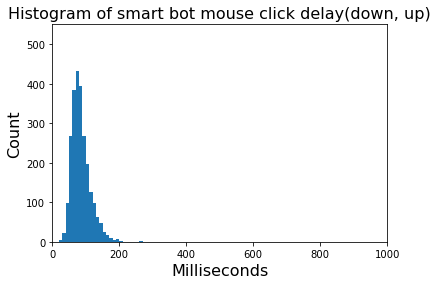

In [10]:
# A more smart bot. Implemented using a lognormal with normal distributions.

import random
import numpy
import matplotlib.pyplot as plt


bot_measurements = (numpy.random.lognormal(4, 0.4, 2467)) + (numpy.random.normal(5, 1, 2467) ** 2)

plt.hist(bot_measurements, bins=range(0, 1000, 10))
plt.title('Histogram of smart bot mouse click delay(down, up)', size= 16)
plt.ylabel('Count', size= 16)
plt.xlabel('Milliseconds', size= 16)
plt.axis([0, 1000, 0, 550])
plt.show()

In [11]:
connection.commit()
connection.close()